In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt, sin, exp
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt, random
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from copy import copy
from numpy import sin, cos, pi
import random
from numpy import loadtxt
from numpy import arange
%matplotlib inline

### Ex 1

In [6]:
tolerancia = 1e-4

# Inicializar
# 1m com espaçamento de 1cm  (100x100)
grelha = np.zeros((100,100))
grelha[0] = 1


In [7]:
grelha

array([[1., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

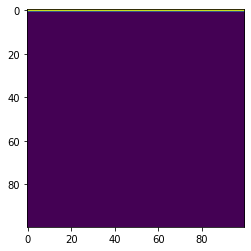

In [8]:
plt.imshow(grelha)
plt.show()

1 iterações..


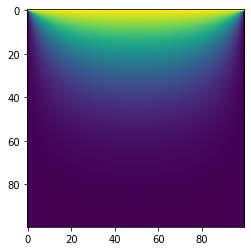

In [10]:
# Gauss-Seidel ou Laplace??
i = 0
while True:
    i += 1
    atual = grelha.copy()

    for row in range(len(grelha)):
        for col in range(len(grelha)):

            # Não é para alterar
            if row in [0, len(grelha)-1] or col in [0, len(grelha)-1]:
                atual[row, col] = grelha[row, col]

            else:
                atual[row, col] = (grelha[row, col+1] + grelha[row, col-1] + grelha[row+1, col] + grelha[row-1, col]) / 4

    if np.max(np.abs(atual - grelha)) < tolerancia:
        break

    grelha = atual.copy()


    
print(f"{i} iterações..")

# Show with imshow
plt.imshow(grelha)
plt.show()

1958 iterações..


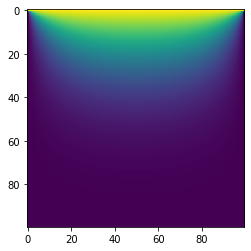

In [20]:
# Gauss-Seidel w/relaxação
# TODO: DEVIA SER MAIS RAPIDO; DA MALLLLLL

tolerancia = 1e-4

# Inicializar
# 1m com espaçamento de 1cm  (100x100)
grelha = np.zeros((100,100))
grelha[0] = 1

# w é a importancia da iteração atual com a anterior
omega = 0.9

i = 0
while True:
    i += 1
    atual = grelha.copy()

    for row in range(len(grelha)):
        for col in range(len(grelha)):

            # Não é para alterar
            if not(row in [0, len(grelha)-1] or col in [0, len(grelha)-1]):
                atual[row, col] = (omega/4) * (grelha[row, col+1] + grelha[row, col-1] + grelha[row+1, col] + grelha[row-1, col]) + (1-omega) * grelha[row, col]


    if np.max(np.abs(atual - grelha)) < tolerancia:
        break

    grelha = atual#.copy()


    
print(f"{i} iterações..")

# Show with imshow
plt.imshow(grelha)
plt.show()

### Ex 3

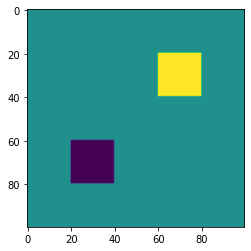

In [45]:
# Gauss-Seidel w/relaxação
# TODO: DEVIA SER MAIS RAPIDO; DA MALLLLLL

tolerancia = 1e-6

# Inicializar
# 1m com espaçamento de 1cm  (100x100)
grelha = np.zeros((100,100))

grelha[20:40, -40:-20] = 1
grelha[-40:-20, 20:40] = -1

# w é a importancia da iteração atual com a anterior
omega = 0.9

plt.imshow(grelha)
plt.show()

In [52]:
original = grelha.copy()
# TODO: entender, provavelmente nao ta mt bem 
# Aqui tou meio confuso sobre oq é o rho, episton,etc e como elees se encaixam aqui
# Falta rho
h = 0.001 # L/M lado sobre a quantidade de pontos do lado
i = 0
episolon0 = 1
while True:
    i += 1
    atual = grelha.copy()

    for row in range(len(grelha)-1):
        for col in range(len(grelha)-1):

            # Não é para alterar
            if not(row in [0, len(grelha)-1] or col in [0, len(grelha)-1]):#original[row, col] == 0:
                atual[row, col] = (omega/(4*episolon0)) * (grelha[row, col+1] + grelha[row, col-1] + grelha[row+1, col] + grelha[row-1, col] + original[row, col]*h**2) + (1-omega) * grelha[row, col]


    if np.max(np.abs(atual - grelha)) < tolerancia:
        break

    grelha = atual#.copy()


    
print(f"{i} iterações..")


4808 iterações..


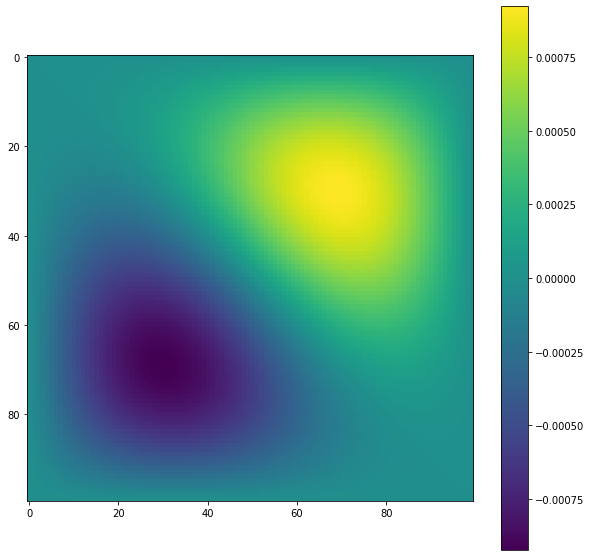

In [53]:
plt.figure(figsize=(10,10))
plt.imshow(grelha)

plt.colorbar()
plt.show()

### Ex 4

In [56]:
def t0(t):
    return 10+12*sin((2*pi*t) /365)

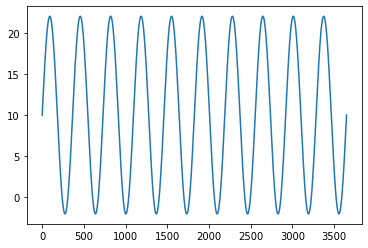

In [61]:
x = np.linspace(0, 365*10, num=365*100)
y = [t0(t) for t in x]

plt.plot(x, y)

In [ ]:
D = 0.1

L = 20
N = 100
a = L/N
h = 0.01
D = 0.1

A = 10
B = 12
tau = 365
Tfixed = 11
tmax = 10.01 * 365
steps = int(tmax/h)




T = np.empty(N+1, float)
T[0:N] = A
tt = np.linspace(8, 10, 100)
T_list = [(t0(myt) for myt in tt)]

for k in range(steps):
    t = k*h
    T[0] = t0(t)

    T[1:N] += h*

# dT/dt = D d2T/d2(x)